In [2]:
# import the package which we will use to programing
import os
import csv
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
import random
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import math
import multiprocessing
import time

from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from torchvision import datasets

In [3]:
# use gpu if you have
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device = mps_device)
    print ("MPS device is available. Successfully initiated:")
    print (x)
    device = mps_device
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU is available.")
    print("GPU device count:", torch.cuda.device_count())
    print("Current GPU device:", torch.cuda.current_device())
    print("GPU device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    device = torch.device("cpu")
# device = torch.device("cpu")

print("Use device:",device)

# set random seed
SEED = int(time.time())
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
# multiprocessing.set_start_method("fork")

GPU is available.
GPU device count: 1
Current GPU device: 0
GPU device name: NVIDIA GeForce RTX 3070 Ti Laptop GPU
Use device: cuda:0


In [4]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(0.485, 0.229)
    ])
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(0.485, 0.229)
    ])

In [5]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=valid_transform)

print('Number of total training dataset:', len(trainset))
print('Number of testing dataset:', len(test_set))

length = len(trainset)
n_TrainData = math.floor(length * 0.8)
n_ValidData = length - n_TrainData
print('Number of training data : ',n_TrainData)
print('Number of validation data : ', n_ValidData)

train_set, valid_set = torch.utils.data.random_split(
    trainset,
    [n_TrainData, n_ValidData],
    generator=torch.Generator().manual_seed(0)
)


class_num = 10
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Number of total training dataset: 60000
Number of testing dataset: 10000
Number of training data :  48000
Number of validation data :  12000


In [6]:
# Loaded Datasets to DataLoaders

##############################################################################
#                    TODO: Validation Dataloader                             #
##############################################################################

# please change the batch_size
trainloader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers = 0)
validloader = DataLoader(valid_set, batch_size=32, shuffle=False, num_workers = 0)
testloader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers = 0)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


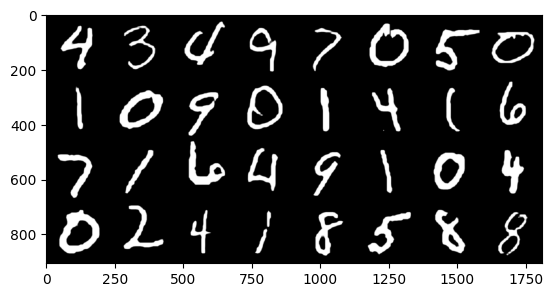

    4     3


In [7]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [8]:
##############################################
# Build your model here!
#
# Practice:
#   Try to implement VGG-16 with pytorch !
##############################################

class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()

        ##############################################################################
        #                          TODO: implement VGG-16.                           #
        ##############################################################################
        self.conv_block = nn.Sequential(
#---------------------------------------------------------------------------------------------------------------------------
            nn.Conv2d(in_channels=1,  out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
#---------------------------------------------------------------------------------------------------------------------------
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
#---------------------------------------------------------------------------------------------------------------------------
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
#---------------------------------------------------------------------------------------------------------------------------
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
#---------------------------------------------------------------------------------------------------------------------------
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
        )
#---------------------------------------------------------------------------------------------------------------------------
        self.feat_classifier = nn.Sequential(
            nn.Linear(7*7*512, 4096),
            nn.BatchNorm1d(4096),
            nn.Dropout(0, 2),
            nn.ReLU(),
            nn.Linear(4096, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = torch.flatten(x, 1)
        x = x.to(device)
        x = self.feat_classifier(x)
        return x

model = VGG16()
model.to(device)

VGG16(
  (conv_block): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding

In [9]:
## Use GPU
print(device)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

##############################################################################
#                         TODO: Design the Parameters                        #
##############################################################################

learning_rate = 0.0002
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epochs = 20

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

model.train()

cuda:0


VGG16(
  (conv_block): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding

In [10]:
from torchsummary import summary
summary(model, (1,224,224),device = "cuda")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]             640
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

In [12]:
WEIGHT_PATH = './weight/model_weight_2.pth'
checkpoint = torch.load(WEIGHT_PATH , map_location="cuda:0")
model.load_state_dict(checkpoint)
device = torch.device("cuda:0")

In [ ]:
# Training model
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

# Specify the saving path
SAVING_PATH = './weight/'

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, epochs+1):# loop over the dataset multiple times

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    print('running epoch: {}'.format(epoch))

    # train the model
    model.train()
    train_correct = 0
    train_total = 0
    for data, target in tqdm(trainloader):
      # move tensors to GPU if CUDA is available
      data, target = data.to(device), target.to(device)
      # clear the gradients of all optimized variables
      optimizer.zero_grad()
      # forward pass: compute predicted outputs by passing inputs to the model
      output = model(data)
      # calculate the batch loss
      loss = criterion(output, target)
      # backward pass: compute gradient of the loss with respect to model parameters
      loss.backward()
      # perform a single optimization step (parameter update)
      optimizer.step()
      # update training loss
      train_loss += loss.item()*data.size(0)
      # update training Accuracy
      train_total += target.size(0)
      _, predicted = torch.max(output.data, 1)
      train_correct += (predicted == target).sum().item()


    # validate the model
    model.eval()
    valid_correct = 0
    valid_total = 0
    for data, target in tqdm(validloader):
        # move tensors to GPU if CUDA is available
        target = target.long()
        data, target = data.to(device), target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss
        valid_loss += loss.item()*data.size(0)
        # update validation Accuracy
        valid_total += target.size(0)
        _, predicted = torch.max(output.data, 1)
        valid_correct += (predicted == target).sum().item()
    # calculate average losses
    train_loss = train_loss/len(trainloader.dataset)
    valid_loss = valid_loss/len(validloader.dataset)

    # print training/validation statistics
    print('Training Loss: {:.6f} \tTraining Accuracy: {:.6f}'.format(train_loss,(100 * train_correct / train_total)))
    print('Validation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(valid_loss,(100 * valid_correct / valid_total)))

    train_loss_list.append(train_loss)
    train_acc_list.append(100 * train_correct / train_total)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(100 * valid_correct / valid_total)

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), SAVING_PATH+'/model_weight_2.pth')
        valid_loss_min = valid_loss

print('Finished Training')

In [ ]:
def plt_acc_all():
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('All acc')

    ax1.plot(train_acc_list)
    ax1.plot(valid_acc_list)

    ax1.legend(['train_acc', 'valid_acc'], loc='upper left')
    ax1.set_xlabel('epoch')
    plt.show()

def plt_loss_all():
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('All loss')

    ax1.plot(train_loss_list)
    ax1.plot(valid_loss_list)

    ax1.legend(['train_loss', 'valid_loss'], loc='upper left')
    ax1.set_xlabel('epoch')
    plt.show()

In [ ]:
plt_loss_all()
plt_acc_all()

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 99.310000 %
